In [34]:
import pandas as pd

vectors = pd.read_parquet('../data/vectors/music_lyrics_vectors.parquet')

In [35]:
metadata = pd.read_parquet('../data/transformed/music_metadata.parquet')

In [36]:
vectors.columns = ['id', 'vector']
vectors = vectors.merge(metadata, on="id")
del metadata

In [37]:
vectors = vectors[['id', 'vector', 'title', 'artist']]

In [38]:
from sklearn.cluster import KMeans, DBSCAN

In [39]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score


def optimal_clusters_silhouette(data: pd.Series, max_clusters=10):
    scores = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, scores, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for Optimal Clusters")
    plt.show()


In [ ]:
import numpy as np
vectors = vectors[~vectors['vector'].isnull()]
sample = vectors.sample(n=50000)

In [56]:
def kmeans_clustering(data, n_clusters=4, random_state=42):
    """
    Perform KMeans clustering on 300-dimensional data.
    :param data: numpy array of shape (n_samples, 300)
    :param n_clusters: Number of clusters to form.
    :param random_state: Random state for reproducibility.
    :return: Cluster labels and KMeans model.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(data)
    return labels, kmeans

In [57]:
labels, kmeans = kmeans_clustering(data=np.vstack(sample['vector']))

In [58]:
from sklearn.decomposition import PCA


def plot_kmeans_clusters(data, labels):
    """
    Visualize KMeans clusters using PCA for dimensionality reduction.
    :param data: 300-dimensional data (n_samples, 300)
    :param labels: Cluster labels assigned by KMeans
    """
    pca = PCA(n_components=2)  # Reduce to 2D for visualization
    reduced_data = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label="Cluster")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("KMeans Clustering Visualization (PCA Reduced)")
    plt.show()

In [59]:
kmeans

KMeans(n_clusters=4, random_state=42)

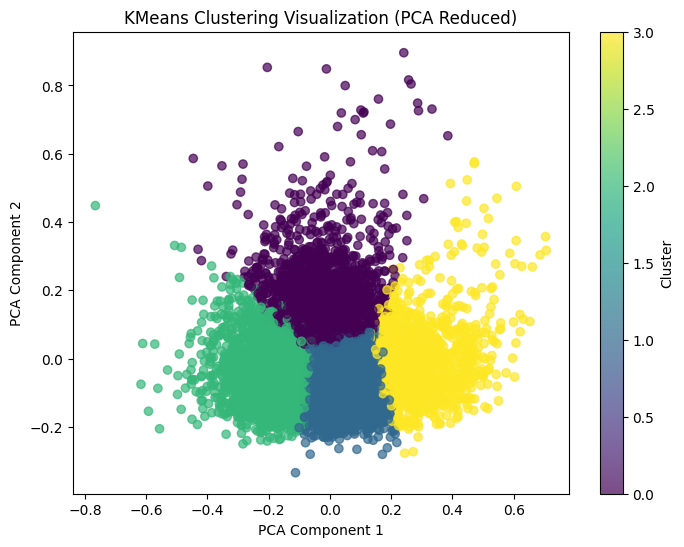

In [60]:
plot_kmeans_clusters(np.vstack(sample['vector']), labels=labels)

In [61]:
def report_cluster():
    unique_clusters = np.unique(labels)
    print("\nKMeans Cluster Report:")
    for cluster in unique_clusters:
        cluster_indices = np.where(labels == cluster)[0]
        print(f"Cluster {cluster}: {len(cluster_indices)} points")


In [62]:
report_cluster()


KMeans Cluster Report:
Cluster 0: 2170 points
Cluster 1: 3451 points
Cluster 2: 2931 points
Cluster 3: 1448 points
